In [18]:
import sys, re, os
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [20]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [21]:
chdir = True

In [22]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [23]:
from IPython.display import IFrame
IFrame("../assets/testbed.pdf", width=600, height=420)

In [1]:
# Metadata for specific SFC configurations

exp_ls = 'random_rate'
#exp_rs = "exp-4-1-1"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

# Load stimulus experiments

## High-level KPIs:


In [25]:
current_dir = os.getcwd()

file_path = os.path.abspath('../linear/random_rates.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 0 to 21980
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          21981 non-null  float64
 1   output_rate                         21981 non-null  float64
 2   latency                             21981 non-null  float64
 3   firewall_instructions               21981 non-null  float64
 4   nf_router_instructions              21981 non-null  float64
 5   ndpi_stats_instructions             21981 non-null  float64
 6   payload_scan_instructions           21981 non-null  float64
 7   bridge_instructions                 21981 non-null  float64
 8   firewall_branches                   21981 non-null  float64
 9   nf_router_branches                  21981 non-null  float64
 10  ndpi_stats_branches                 21981 non-null  float64
 11  payload_scan_branches               21981

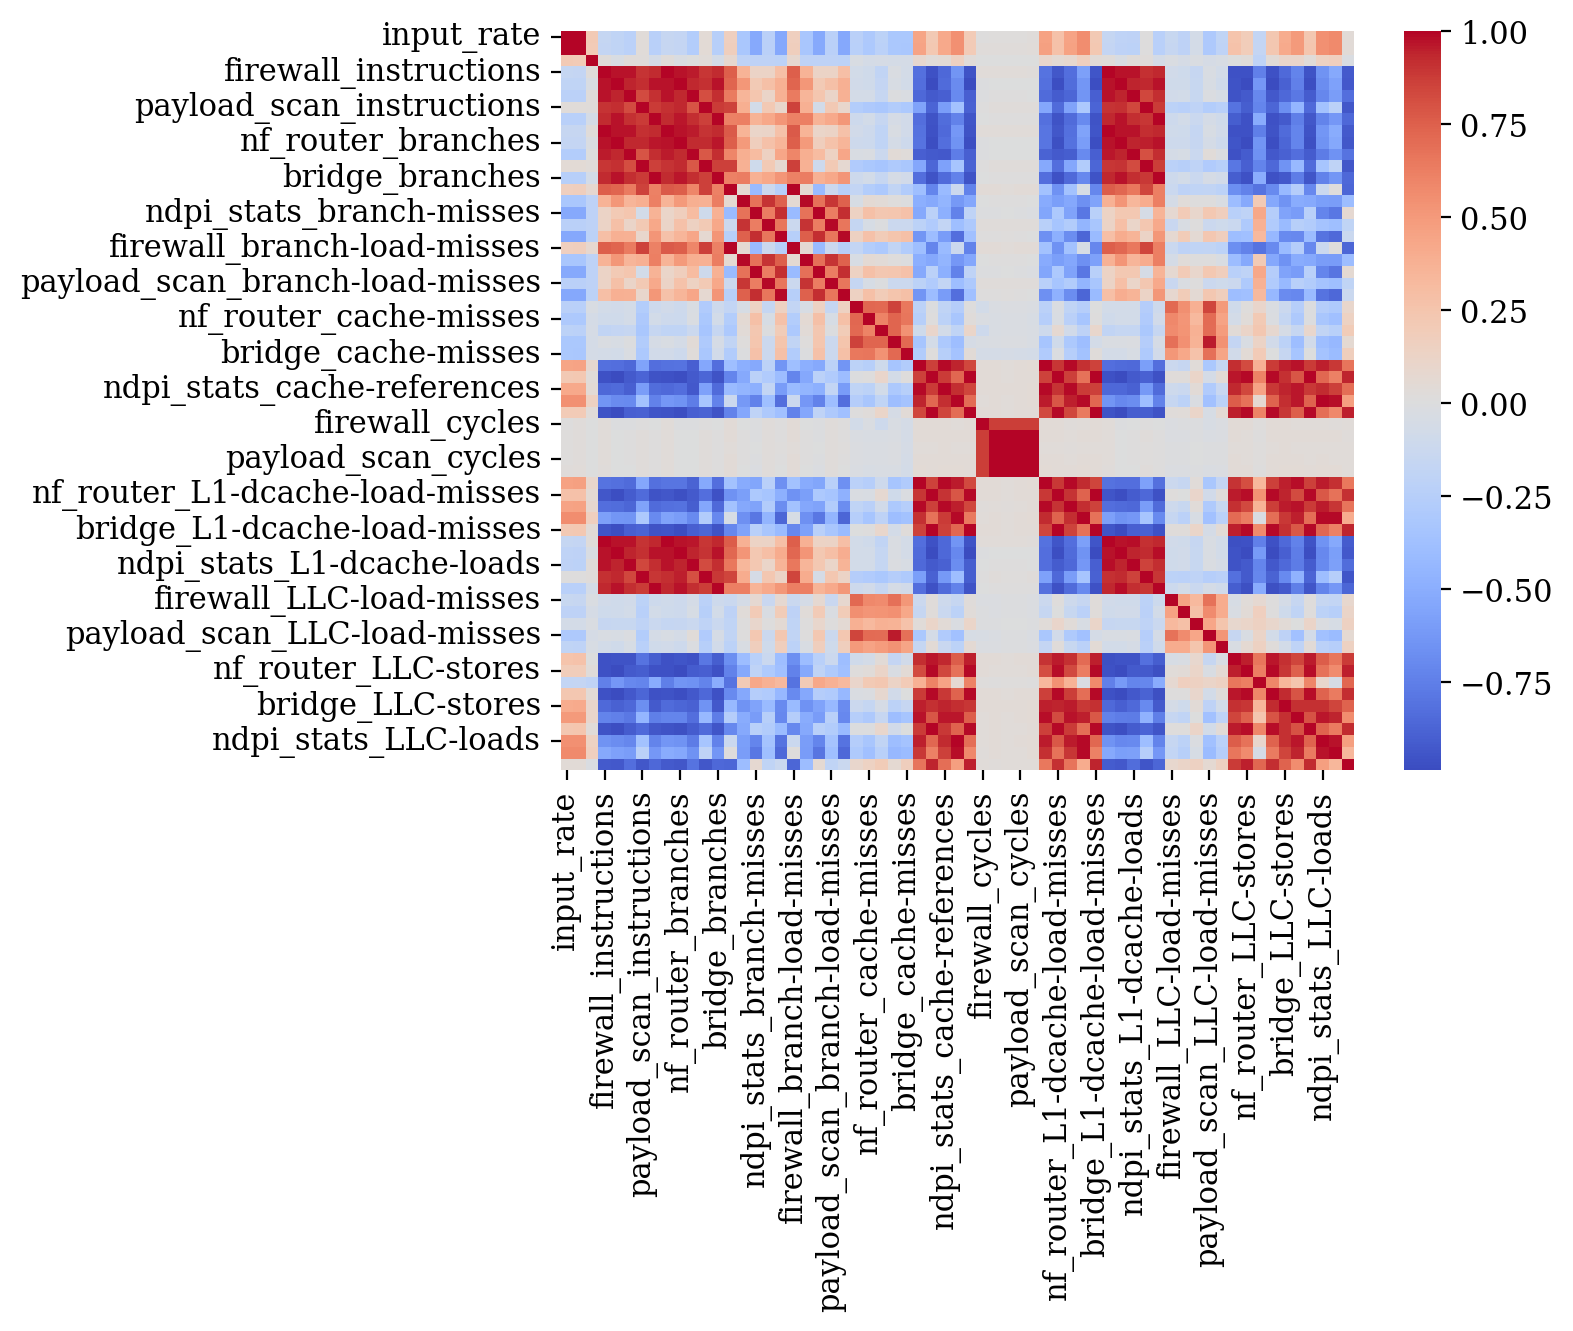

In [26]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.savefig('heatmap_ls_random_rate.png')
plt.show()

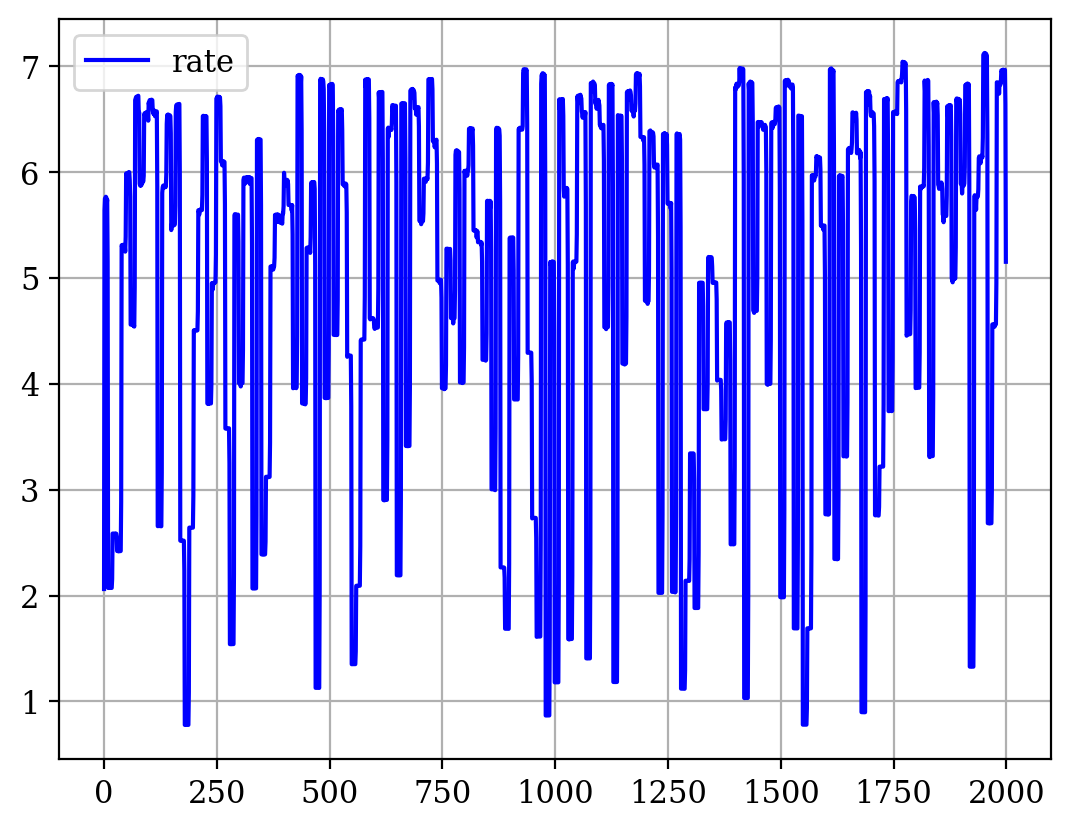

4.557533720258471
0.64956534194572
7.123542516256499


In [27]:
# input rate distribution
a = list(data['input_rate']/1000)
plt.plot(a[0:2000], c='b', label='rate')
plt.legend()
plt.grid()
plt.show()
print(sum(a)/len(a))
print(min(a))
print(max(a))

# principal component analysis

1362822
(21981, 2)


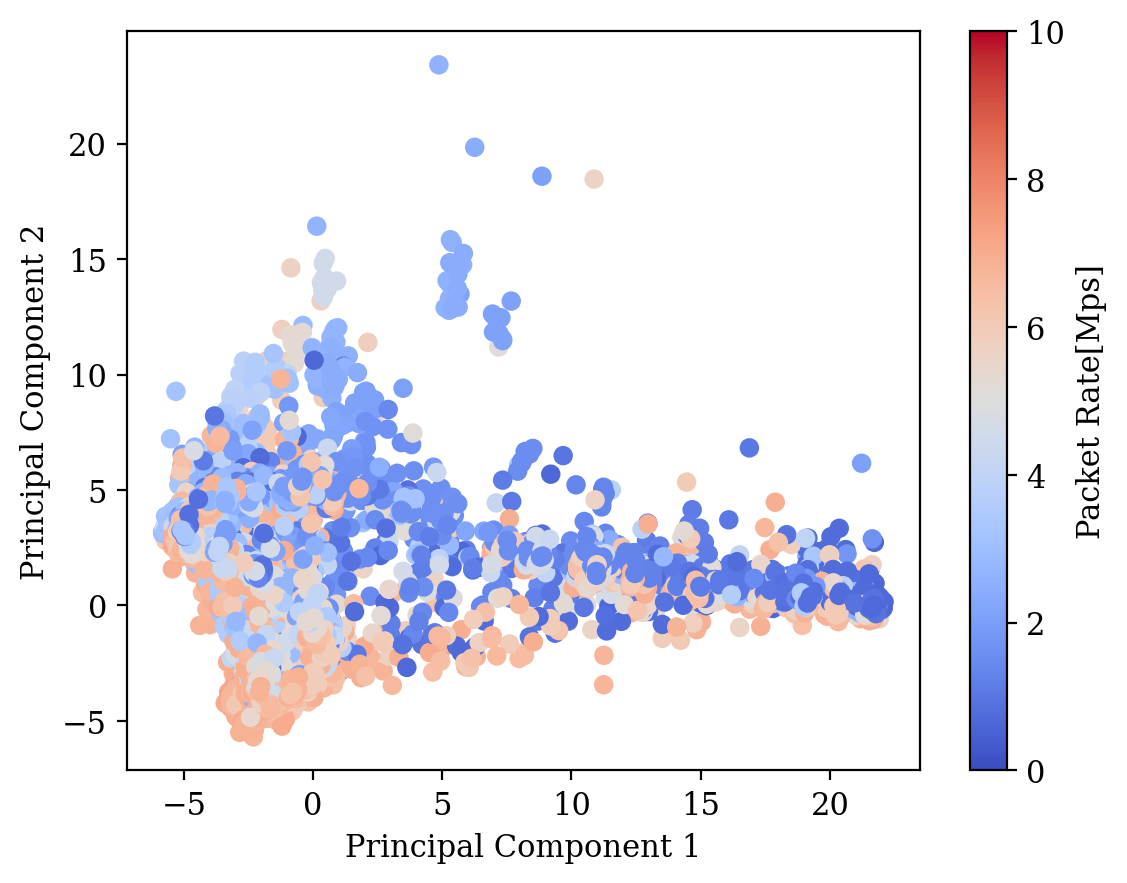

Eigenvectors:
 [[-0.1 -0.   0.2  0.2  0.2  0.1  0.2  0.2  0.2  0.2  0.1  0.2  0.1  0.1
   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.  -0.   0.   0.  -0.2
  -0.2 -0.2 -0.1 -0.2 -0.  -0.  -0.  -0.  -0.  -0.2 -0.2 -0.2 -0.1 -0.2
   0.2  0.2  0.2  0.1  0.2 -0.  -0.  -0.   0.  -0.  -0.2 -0.2 -0.1 -0.2
  -0.2 -0.2 -0.2 -0.1 -0.1 -0.2]
 [-0.2 -0.1 -0.1 -0.1 -0.  -0.2 -0.  -0.1 -0.1 -0.  -0.2 -0.  -0.2  0.1
   0.2  0.1  0.2 -0.2  0.1  0.2  0.1  0.2  0.2  0.2  0.2  0.2  0.2 -0.1
   0.  -0.1 -0.2  0.  -0.  -0.  -0.  -0.  -0.  -0.1  0.  -0.1 -0.2  0.
  -0.1 -0.1 -0.1 -0.1 -0.   0.1  0.2  0.1  0.2  0.1  0.   0.1  0.2  0.
  -0.1 -0.1  0.  -0.2 -0.2  0.1]]
Eigenvalues:
 [32.  10.8]
1.0408340855860843e-17


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data into a Pandas dataframe
#df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components =2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=10)
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))
# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('Packet Rate[Mps]')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'pca_random_rate.png')
plt.savefig(file_path)
plt.show()


# Print the eigenvectors and eigenvalues with one decimal place
a = np.round(pca.components_, 1)
b=np.round(pca.explained_variance_, 1)
c=np.dot(pca.components_[0],pca.components_[1])
print("Eigenvectors:\n", np.round(pca.components_, 1))
print("Eigenvalues:\n", np.round(pca.explained_variance_, 1))
print(c)


dependent_variable:7.123542516256499
1362822
(21981, 5)
PCA explained variance ratio: [0.51578718 0.17416295]


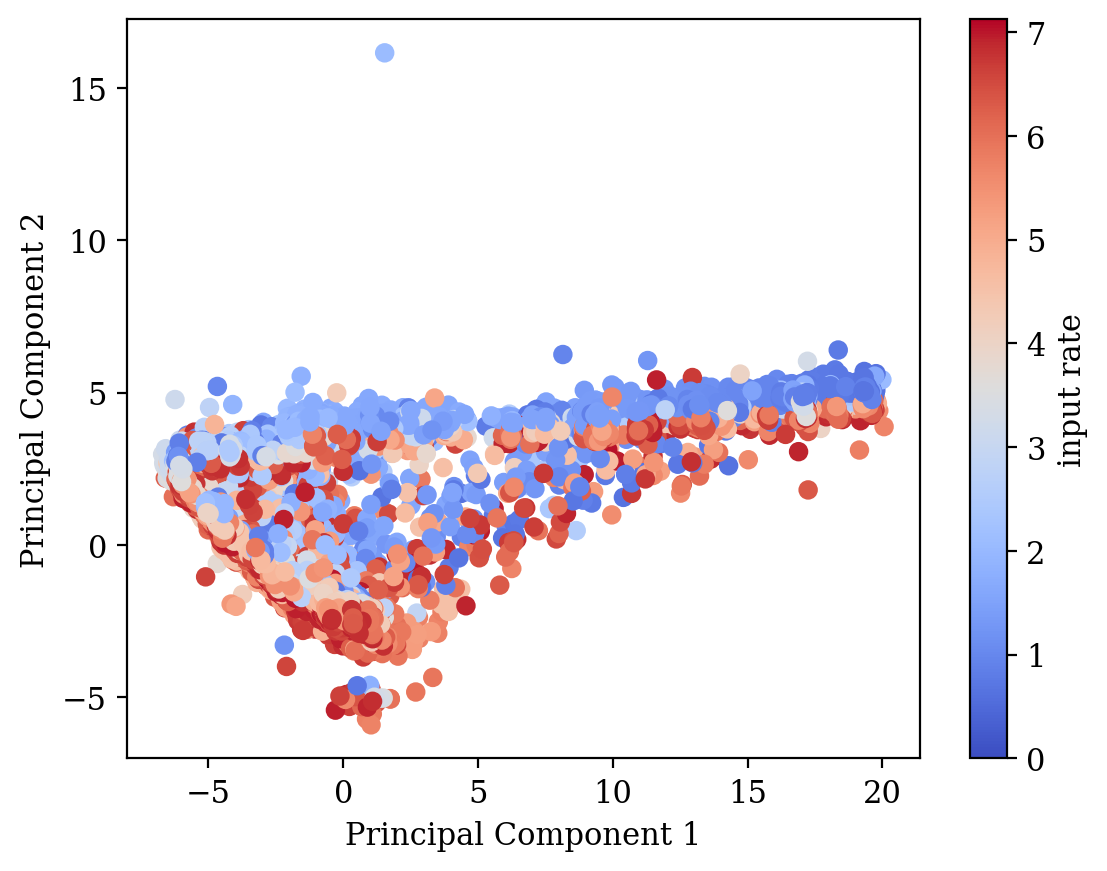

In [35]:
#spca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler


# Load CSV data into a Pandas dataframe
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'input_rate'
#target_col = 'latency'
independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col].div(1000)


print(f'dependent_variable:{max(dependent_variable)}')



# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA

# Create a Sparse PCA object with 2 components
spca = SparsePCA(n_components=5, alpha =1)


# Fit the Sparse PCA model to the data
spca.fit(independent_variables_scaled)

# Transform the data into the reduced-dimension representation
X_spca = spca.transform(independent_variables_scaled)

independent_variables_pca = spca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=0, vmax=max(df[target_col].div(1000)))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))


# Get the explained variance ratio
cov_matrix = np.cov(independent_variables_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)


# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label('input rate')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'spca_random_rate.png')
plt.savefig(file_path)
plt.show()




In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp


# Load CSV data 
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)

df = df.replace(['<not counted>'], np.nan)

# Separate the target column from the other columns
target_col = 'latency'

independent_variables = df.drop(target_col, axis=1)


dependent_variable = df[target_col]


print(f'dependent_variable:{max(dependent_variable)}')

print(min(df[target_col]))
print(max(df[target_col]))

# Scale the independent variables
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables)
print(np.size(independent_variables_scaled))


# Perform PCA
pca = PCA()
pca.n_components = 2
pca.fit(independent_variables_scaled)
independent_variables_pca = pca.transform(independent_variables_scaled)

# Get unique values in the dependent variable column
unique_values = dependent_variable.unique()

# Define a colormap based on the unique values
cmap = mp.colormaps.get_cmap('coolwarm')

# Create a scatter plot with colored points
normalize = Normalize(vmin=min(df[target_col]), vmax=max(df[target_col]))
plt.scatter(independent_variables_pca[:, 0], independent_variables_pca[:, 1],
            c=dependent_variable, cmap=cmap, norm=normalize)

print(np.shape(independent_variables_pca))

# Add a color bar to the plot
cbar = plt.colorbar()
cbar.set_label(target_col)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()

dependent_variable:325.565
5.984
325.565
110980


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# rate prediction

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [12]:
# Read the CSV file



#df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
df = pd.read_csv("random_rates.csv", index_col=0)
#df = pd.read_csv("combined.csv",index_col=0)
print(df.shape[1])
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()
# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
print(X.shape[1])
X1 = df.drop(['input_rate','output_rate', 'nf_router_instructions',
             'ndpi_stats_instructions','payload_scan_instructions',
             'firewall_branches','ndpi_stats_branches','payload_scan_branches','bridge_branches'], axis=1)
y = df['input_rate']



# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)

# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)
reg1 = DecisionTreeRegressor(random_state=0)
# Train the regressor on the training set
reg.fit(X_train, y_train)
reg1.fit(X1_train, y1_train)




63
61


DecisionTreeRegressor(random_state=0)

6595
6595


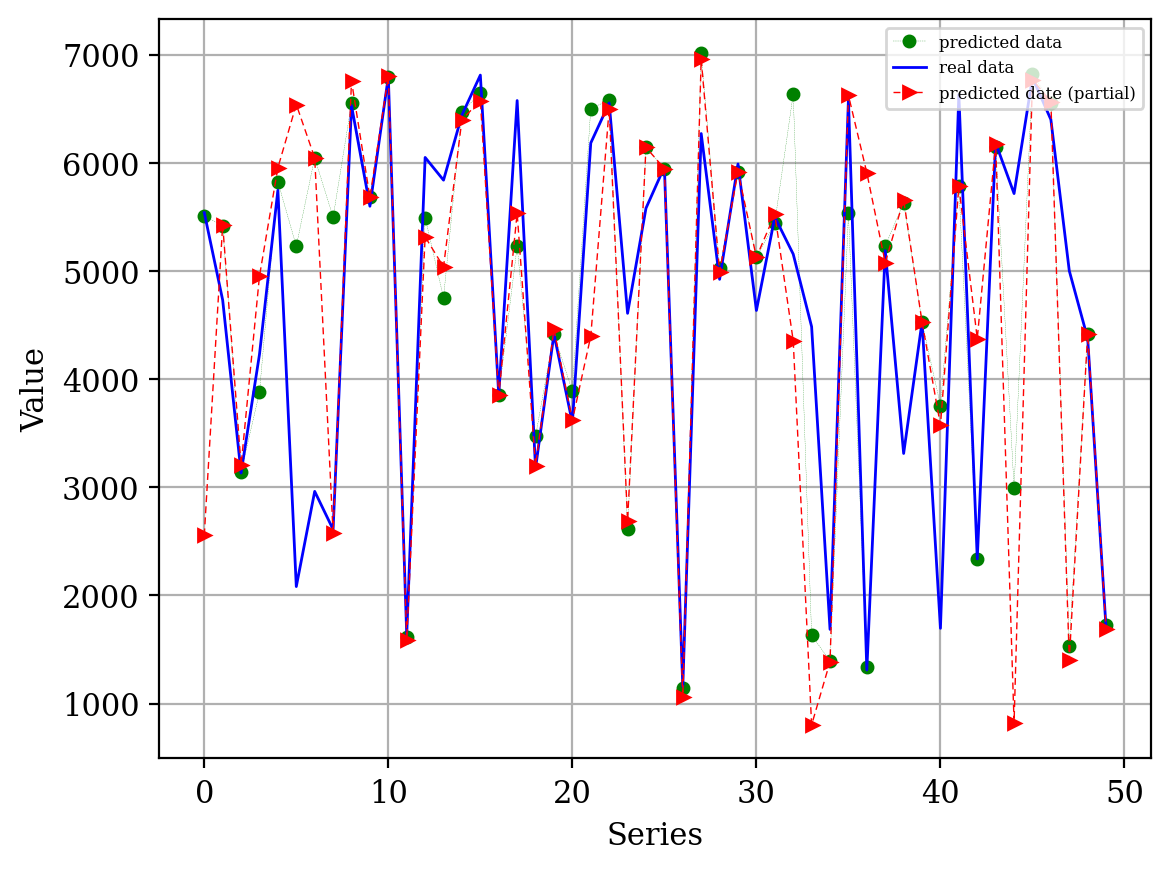

Accuracy within 5% threshold: 40.45489006823351
Accuracy within 5% threshold: 40.45489006823351
[0.0, 48.551933282789996, 57.8316906747536, 64.50341167551174, 70.26535253980288, 75.23881728582259, 79.37831690674754, 82.91129643669447, 86.61106899166035, 89.24943138741472, 89.99241849886278]
[0.0, 48.551933282789996, 57.8316906747536, 64.50341167551174, 70.26535253980288, 75.23881728582259, 79.37831690674754, 82.91129643669447, 86.61106899166035, 89.24943138741472, 89.99241849886278]


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)
y1_pred = reg1.predict(X1_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(len(y_test.values.tolist()))
print(len(y_pred))



plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')
plt.plot(y1_pred[0:50], marker='>',markersize = 4,c='r',linestyle='-', linewidth=0.5, dashes=(5, 3),label='predicted date (partial)')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()

#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'predic_rate_random.png')
plt.savefig(file_path)
plt.show()

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)
print("Accuracy within 5% threshold:", accuracy_within_threshold_partial)

accuracy_cdf=[]
accuracy_partical_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
    accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
    accuracy_partical_cdf.append(accuracy_within_threshold_partial)
print(accuracy_cdf)
print(accuracy_partical_cdf)


C:\Users\Qiong\AppData\Local\Temp\ipykernel_25644\2184869846.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


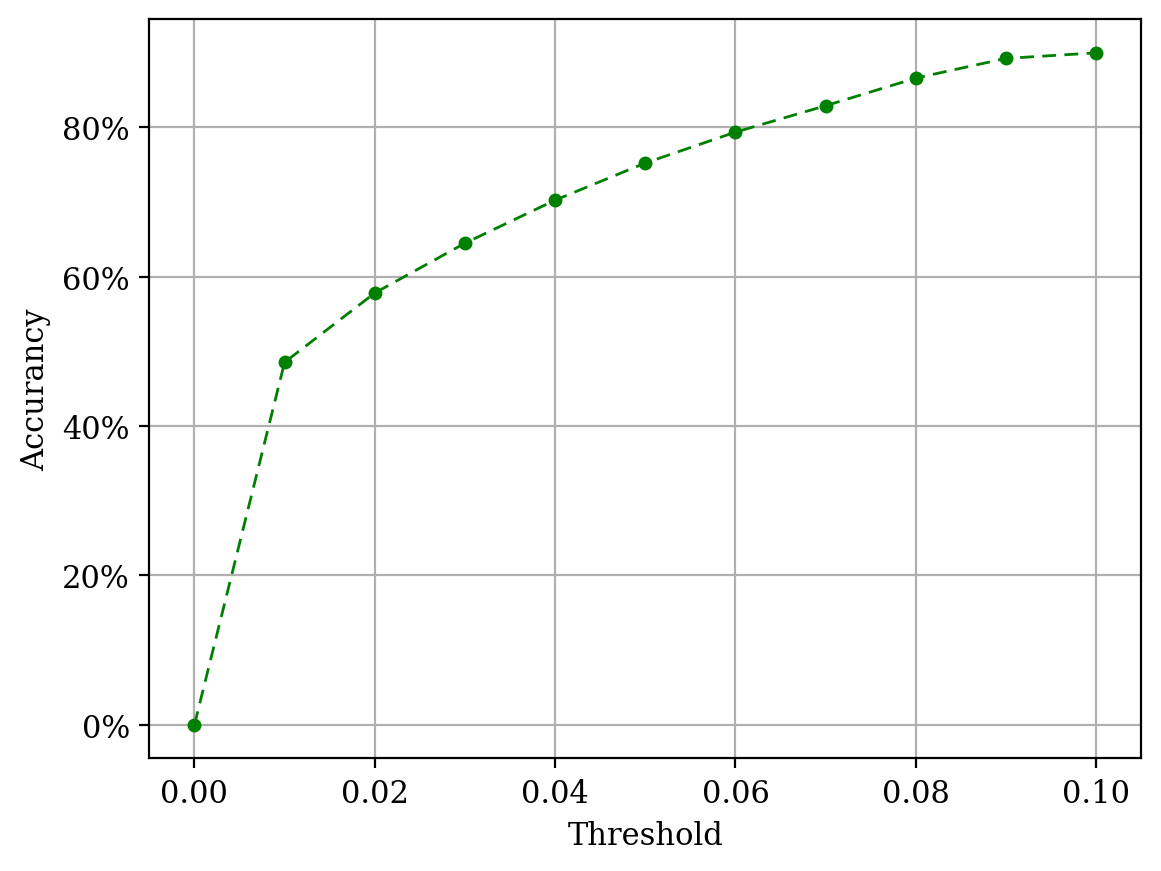

In [14]:
#plt.plot(accuracy_cdf)  
plt.plot([num/100 for num in range(11)],accuracy_partical_cdf, marker='o',markersize = 4, c='g',linestyle='-',linewidth=1, dashes=(5, 3),)  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold')
plt.ylabel('Accurancy')
plt.grid()




C:\Users\Qiong\AppData\Local\Temp\ipykernel_25644\2005506785.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


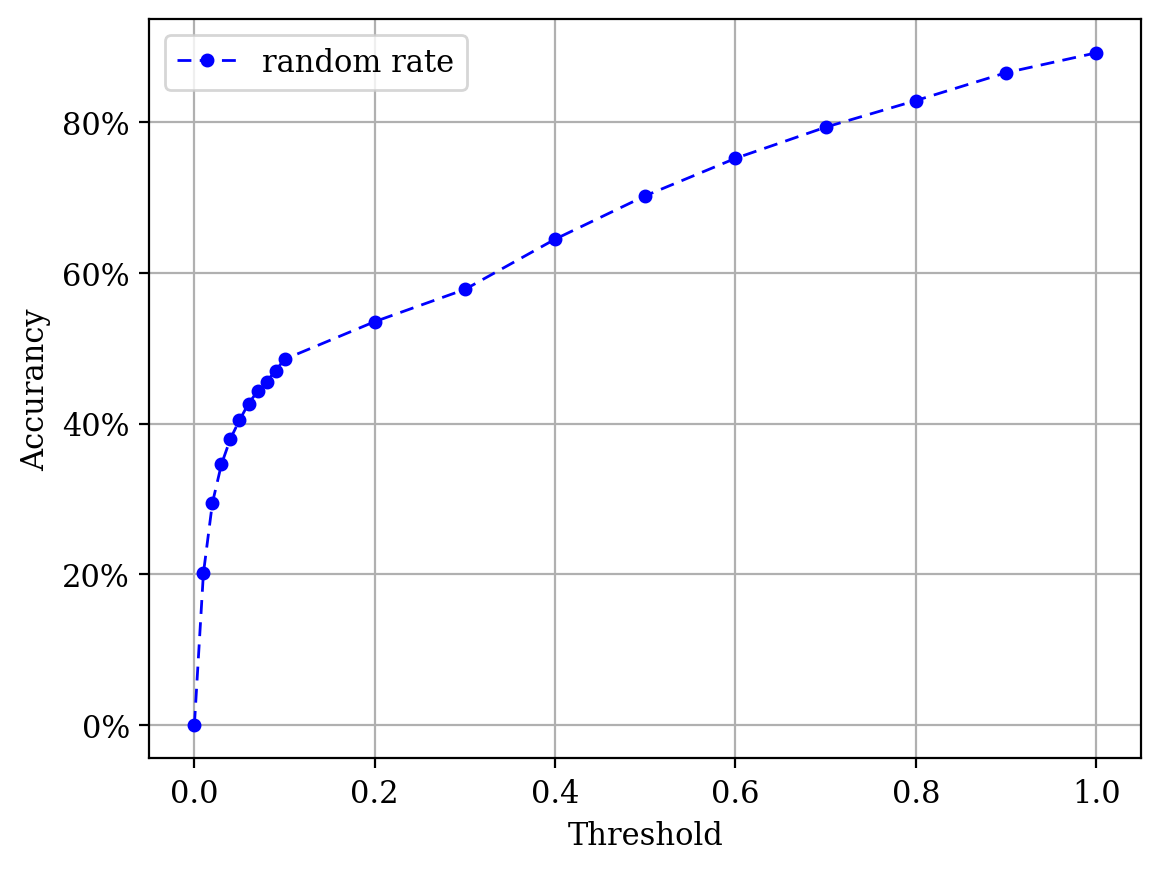

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Example real data and predicted data
b = [item/100 for item in range(10)]+[item/10 for item in range(1,11)]
accurancy_random=[0.0, 20.1213040181956, 29.492039423805917, 34.60197119029568, 
                   38.013646702047005, 40.45489006823351, 42.66868840030326, 44.29112964366945, 
                   45.57998483699773, 47.05079605761941, 48.551933282789996, 53.551933282789996,
                   57.8316906747536, 64.50341167551174, 70.26535253980288, 
                  75.23881728582259, 79.37831690674754, 82.91129643669447, 86.61106899166035, 
                  89.24943138741472]
accurancy = [0.0, 87.03703703703704, 96.29629629629629, 96.29629629629629, 96.29629629629629, 
             96.29629629629629, 96.29629629629629, 96.29629629629629, 
             96.29629629629629, 96.29629629629629]

#plot
#plt.plot([num/10 for num in range(10)],accurancy, marker='x',markersize = 4, c='k',linestyle='-',linewidth=1, dashes=(5, 3),label='fixed rate')  
plt.plot(b,accurancy_random, marker='o',markersize = 4, c='b',linestyle='-',linewidth=1, dashes=(5, 3),label = 'random rate')  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold')
plt.ylabel('Accurancy')
plt.legend()
plt.grid()



#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'rate_accuracy_compare.png')
plt.savefig(file_path)
plt.show()

In [16]:
# Read the CSV file
# Load your dataset into a Pandas dataframe
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
#df = pd.read_csv("random_rates.csv", index_col=0)
df = df.replace(['<not counted>'], np.nan)
# Choose the 5 columns of interest
selected_columns = [ 'input_rate','firewall_instructions', 'nf_router_instructions', 'ndpi_stats_instructions',
                    'payload_scan_instructions','bridge_instructions','latency']

# Create a new dataframe with the selected columns
new_df =  df[selected_columns]

# Separate the features and target variable
X = df.drop('latency', axis=1)  
y = df['latency']

# the size seems now enough
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Initialize the regressor with optional hyperparameters (e.g., max_depth)
reg = DecisionTreeRegressor(random_state=0)

# Train the regressor on the training set
reg.fit(X_train, y_train)


# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

# Print the predicted target values and the actual target values for the test set
#print("Predicted values:", y_pred)
#print("Actual values:", y_test)
# r2_score: a number between 0 and 1, with higher values indicating a better fit.

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 4, linestyle='-', dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:100].tolist(), c='b',linestyle='-',linewidth = 1,label='real data')

plt.xlabel('Series')
plt.ylabel('Values')

plt.legend(loc="upper right", fontsize=12)
plt.grid()
#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'predic_lentency.png')
plt.savefig(file_path)
plt.show()

# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
distances= [dist if dist <= 1 else 1 for dist in distances]


accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100

# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)
print("Accuracy within 5% threshold:", accuracy_within_threshold_partial)

accuracy_cdf=[]
accuracy_partical_cdf=[] 

# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]

    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    distances_parital = [abs(real - pred) / real for real, pred in zip(y_test, y1_pred)]
    accuracy_within_threshold_partial = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
    accuracy_partical_cdf.append(accuracy_within_threshold_partial)
print(accuracy_cdf)
print(accuracy_partical_cdf)

FileNotFoundError: [Errno 2] No such file or directory: 'load_stimulus_exp1.csv'

C:\Users\Qiong\AppData\Local\Temp\ipykernel_25644\2344348229.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


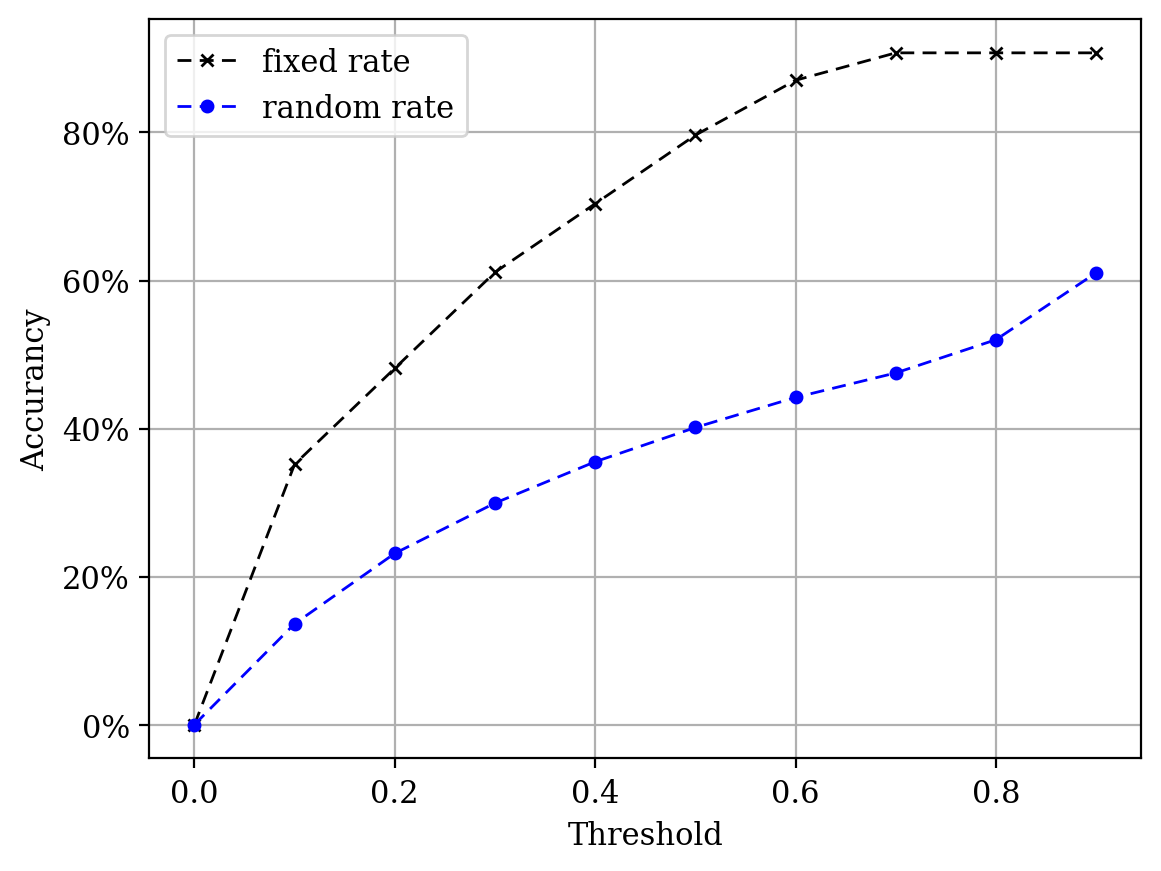

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Example real data and predicted data
accurancy=[0.0, 35.18518518518518, 48.148148148148145, 61.111111111111114, 70.37037037037037, 
                  79.62962962962963, 87.03703703703704, 90.74074074074075, 90.74074074074075, 
                  90.74074074074075]#, 92.5925925925926]
accurancy_random = [0.030326004548900685, 13.646702047005308, 23.15390447308567, 29.946929492039427, 35.526914329037155, 
             40.151630022744506, 44.21531463229719,
             47.52084912812737, 52.00909780136467,
             61.04624715693707]#,71.28127369219105]

#plot
plt.plot([num/10 for num in range(10)],accurancy, marker='x',markersize = 4, c='k',linestyle='-',linewidth=1, dashes=(5, 3),label='fixed rate')  
plt.plot([num/10 for num in range(10)],accurancy_random, marker='o',markersize = 4, c='b',linestyle='-',linewidth=1, dashes=(5, 3),label = 'random rate')  
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.xlabel('Threshold')
plt.ylabel('Accurancy')
plt.legend()
plt.grid()



#save figure
folder_path = 'figures/fixed_rate'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'latency_accuracy_compare.png')
plt.savefig(file_path)
plt.show()

# Linear regression to predict rate

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [50]:
# Read the CSV file
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
#df = pd.read_csv("random_rates.csv", index_col=0)

df = pd.read_csv("combined.csv",index_col=0)

df = df.replace(['<not counted>'], np.nan)
df = df.dropna()
# Separate the features and target variable
X = df.drop(['input_rate','output_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

# Create a linear regression model
model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = SVR(kernel='linear')
# Train the model
reg = model.fit(X_train, y_train)



Accuracy within 5% threshold: 75.97765363128491
[0.0, 82.86778398510242, 91.06145251396647, 94.41340782122904, 97.02048417132217, 98.88268156424581, 99.06890130353817, 99.4413407821229, 99.4413407821229, 99.4413407821229, 99.81378026070763]


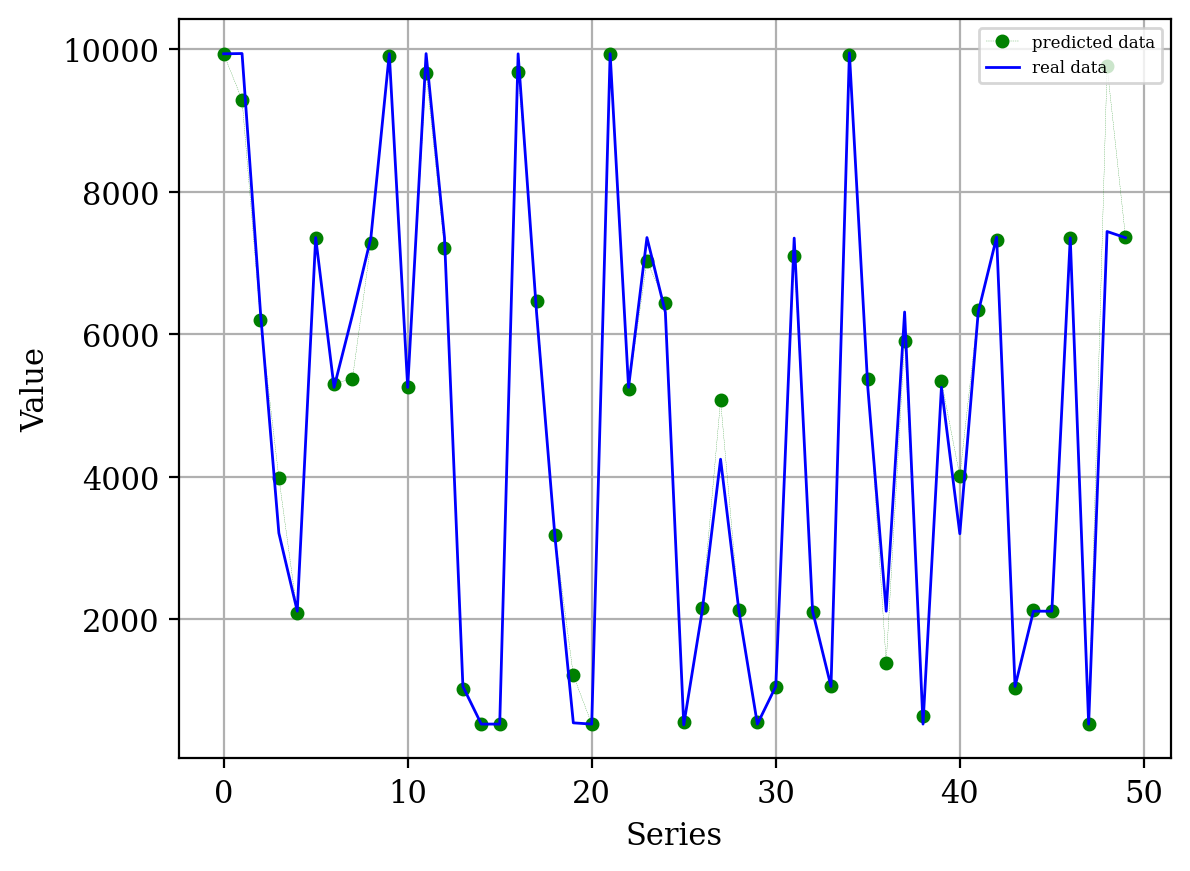

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.1, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [58]:
# Read the CSV file
df = pd.read_csv("load_stimulus_exp1.csv", index_col=0)
#df = pd.read_csv("random_rates.csv", index_col=0)

df = pd.read_csv("combined.csv",index_col=0)

df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate'], axis=1)
y = df['input_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
column_order = X_train.columns
X_test = X_test[column_order]

# Create a linear regression model
model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = SVR(kernel='linear')
# Train the model
reg = model.fit(X_train, y_train)


Accuracy within 5% threshold: 99.62756052141528
[0.0, 98.32402234636871, 98.69646182495345, 99.25512104283054, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.81378026070763, 99.81378026070763]


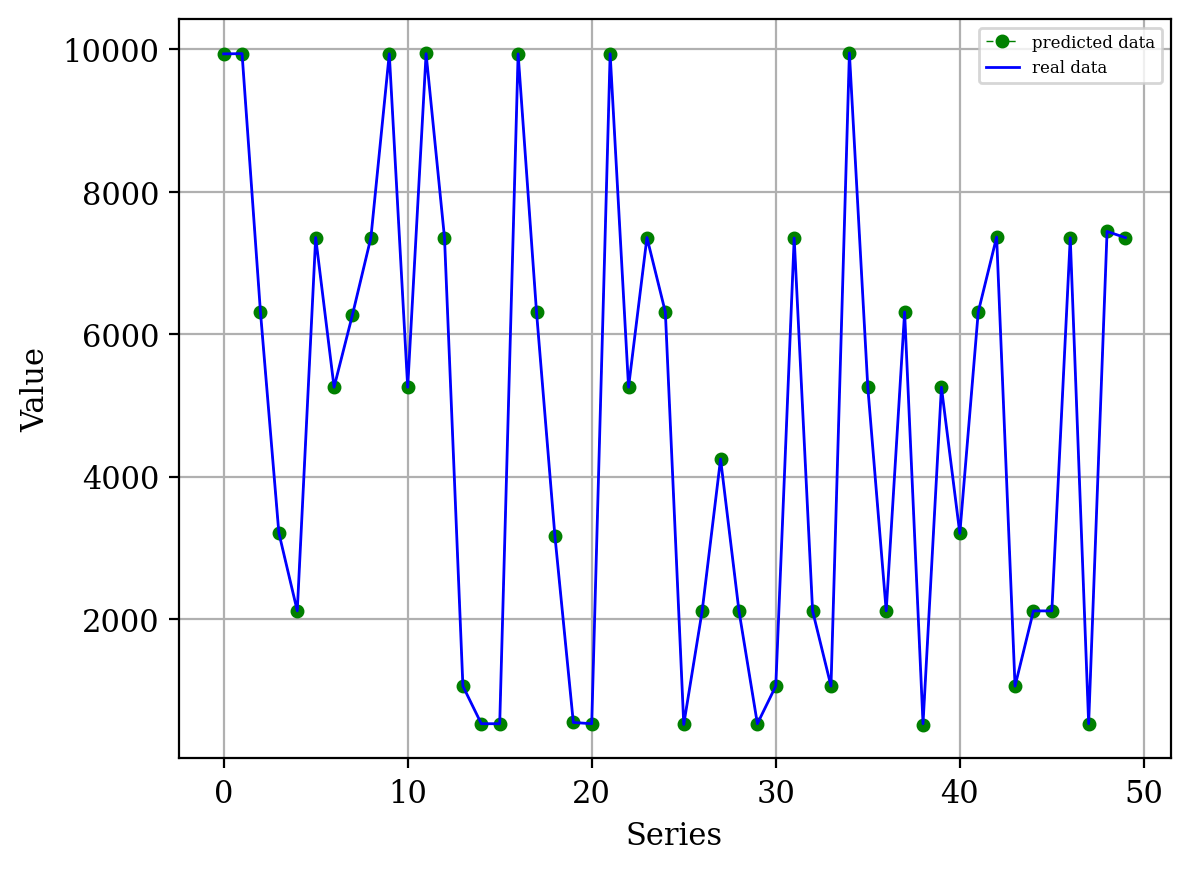

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.5, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/100
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)


# nural network

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv("combined.csv", index_col=0)

# Clean the data
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.drop(['input_rate'], axis=1)
y = df['input_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model with two hidden layers
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=0)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training score:", train_score)
print("Testing score:", test_score)


Training score: 0.9560228324927087
Testing score: 0.9223542893816008


C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy within 5% threshold: 99.62756052141528
[0.0, 98.32402234636871, 98.69646182495345, 99.25512104283054, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.62756052141528, 99.81378026070763, 99.81378026070763]


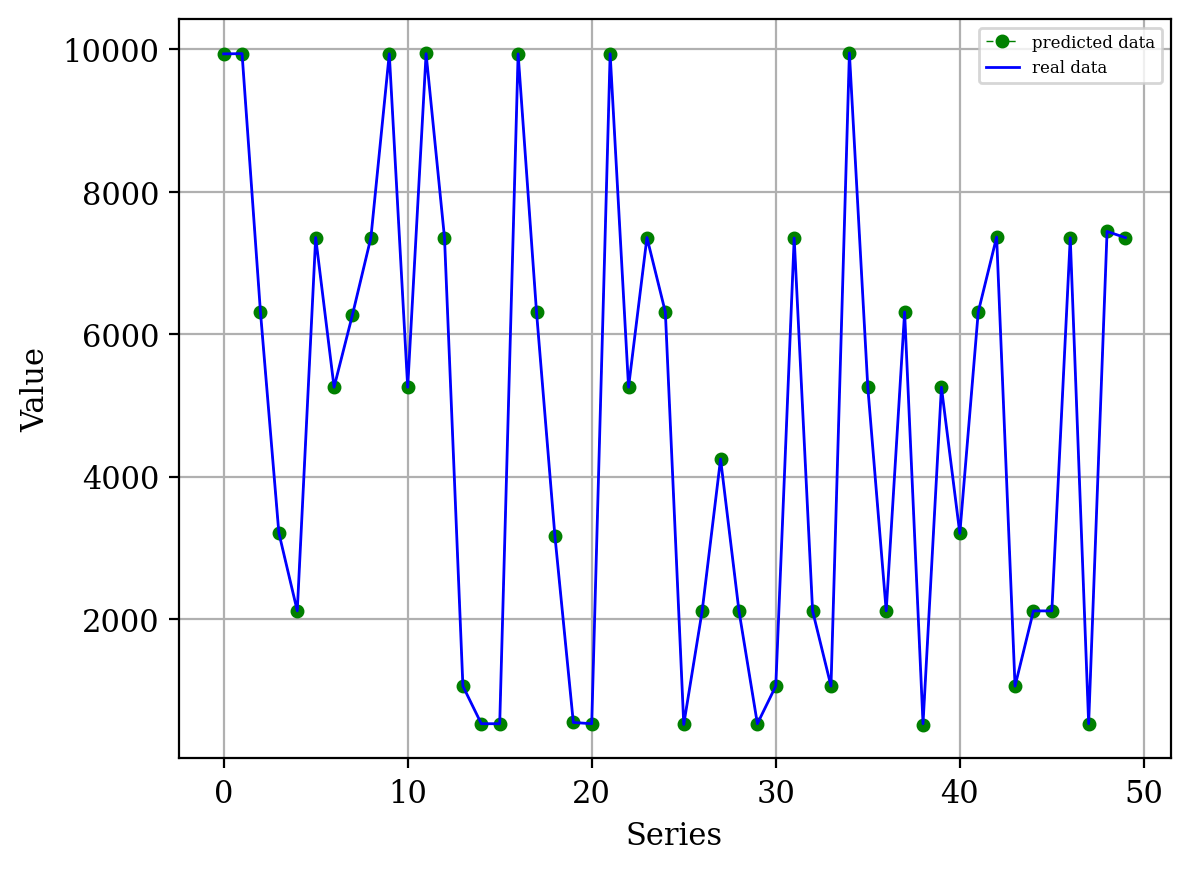

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(y_pred[0:50], marker='o',markersize = 4, c='g',linestyle='-',linewidth=0.5, dashes=(5, 3),label='predicted data')
plt.plot(y_test[0:50].tolist(), linestyle='-',c='b',linewidth = 1,label='real data')


plt.legend(loc="upper right", fontsize=6)
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()


# Calculate the percentage of predictions within 5% threshold
threshold = 0.05  # 5% threshold
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100


# Print the accuracy within the threshold
print("Accuracy within 5% threshold:", accuracy_within_threshold)

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/100
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)
